## This notebook contains some notes about various Machine learning models.This will make easy to learn and read all aspects of ML. I will try to apply some models from scratch as well.

## Linear Regression

In this case the relationship between dependent and independent variable is modeled as a linear regression
- y = $\beta_{0}$ + $\beta{1}$X + $\epsilon$
- It is used for simple prediction task with continuous data, when relation between X and y is approximately linear
## Assumptions
- Linearity
- Independence
- Homosedasticity (constant variance of error)
- Noramlity of errors

## Ridge Regression (L2 Regularization)
- It is a regularized version of linear regression which adds penalty to the coefficients, shrinking them towrads zero. This helps reduced overfitting, specially in the case with multicollenarity (correlated independent variables)
- ### Ridge Regression Loss Function
$$L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2$$

- $y_i$ → Actual values
- $\hat{y}_i$ → Predicted values
- $w_j$ → Model coefficients
- $λ$  → Regularization parameter
- $n$ → Number of samples
- $p$ → Number of features
## When to use L2 regularization
- When multicollenarity exists between features
- We want to improve model generalization by reducing complexity
- In general regularization is a technique that helps prevent overfitting problem. The name regularization occurs because it helps keeping the parameters regular or normal

## Least absolute shrinkage and selection operator (L1 Regularization)
- It adds $L{1}$ penalty to the coefficients which results in some coefficient being set to zero, which effectively performs feature selection.
$$L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|$$
- $y_i$ → Actual values
- $\hat{y}_i$ → Predicted values
- $w_j$ → Model coefficients
- $λ$  → Regularization parameter
- $n$ → Number of samples
- $p$ → Number of features

# When to use LASSO
- When you want to perform feature selection or when you have many features but expect only a few to be significant.
- Adavantages: Useful for sparse dataset, as it automatically selects relevant features by driving some coefficient to zero.
- Primary goal of LASSO is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparese solutions where some coefficient are forced to be exactly set zero.
- LASSO procedure encourages simple sparse models (i.e. models with fewer parameters). This particular type of regression is well suited for models showing high level of multicollenarity or when you want to automate certain parts of model selection ,  like variable selection/parameter eliminations.
- As LASSO does feature selection it can be used when we have more features
## Tuning parameter $λ$
- Choice of $λ$ is curcial in LASSO, large $λ$ increase amount of regularization, leading to more coefficient being pushed  towards zero.
- A small $λ$ reduces the regularization effect, allowing more variables to have non-zero coefficient
- In LASSO, coordinate descent is commonly used to optimize the loss function. It iteratively updates eacg coefficient while holding others fixed.

## Elastic Net Regression (ENR)

- ENR is a combination of Ridge and LASSO regression. It used both L1 and L2 penalties to regularize the model, making it useful when there are multiple correlated features. It performs variable selection and regularization simultaneously. It is most appropirate when the dimensional data is greater than the number of sample used.
- Groupings and variable selection are key role of ENR
- When to use: When there are highly correlated features and you want to balance between Ridge and LASSO
- Advantage; Combines benefits of Ridge and LASSO, handeling multicollenarity as well as feature selection

## Decision Tree Regression (DTR)

- DT split the data into decision nodes based on feature variables
- Key features includes
   - Handel non-linear relationships
   - prone to overfitting if not pruned
- Applications: Predicting sales, risk assesments, price prediction
- Advantages of DT:
   - Easy to understand
   - Lesser data cleaning is required
   - handels non-linear relationships well
   - no need for feature scaling
   - works well on both categorical and numerical data
   - It works as good baseline model for ensemble methods like Random Forest and Gradient Boosting
- Splitting criteria in DTR
  - Split the data to minimize the MSE in the resulting child nodes
  - we can use MAE which is less sensitive to outliers

## Random Forest Regression (RF)

- It is an extension of decision tree regression
- As DT is a single tree algorithm it may not be enough to learn enough features from data.
- RF is also a tree based algorithm that uses the quality features of multiple DT for making decisions
- In short RF algorithm merges the output of multiple decisoon trees to generate the final output

## Example simple DT classifier

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/Users/hemanta/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


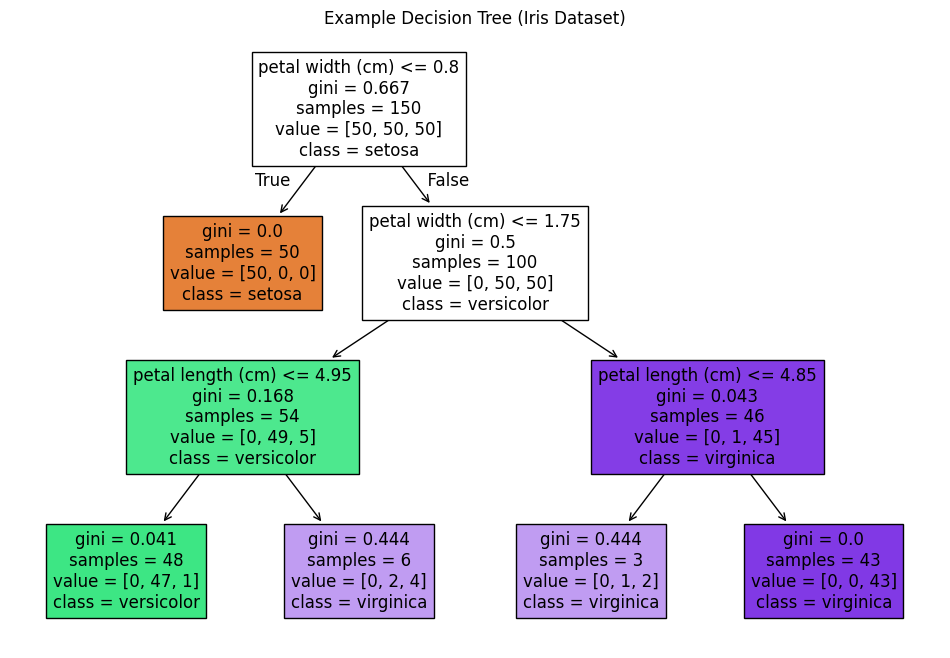

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample data (Iris)
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
class_names = load_iris().target_names

# Fit a decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Example Decision Tree (Iris Dataset)")
plt.show()


## Gini impurity

Splitting a DT based on Gini Impurity
- For each possible split create a child nodes and calculate  the gini impurity of each child node]
- Calculate gini impurity of the split as the weighted average gini impurity of the child nodes
- Select the split with lowest gini impurity

In [12]:
from IPython.display import display, Math
display(Math(r'Gini = 1 - \sum_{i=1}^{C} p_i^2'))

<IPython.core.display.Math object>

- $p_{i}$ is the probability of class i in the node.
- Gini =0; Perfectly pure node (only one class present)
- Higher Gini (~0.5 for binary): more mixed classes
- Example as
- 4 samples of class A
- 6 samples of class B
- $p_{A}$ = $\frac{4}{10}$, $p_{B}$ = $\frac{6}{10}$
- Gini = 1- $\left( \frac{4}{6} \right)^2$- $\left( \frac{6}{10} \right)^2$ = 0.48

In [2]:
# from sklearn one can use gini as an criteria as following
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')  # default is 'gini'
